### Importación de datos



In [46]:
import matplotlib.pyplot as plt
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

L_tiendas = [tienda, tienda2, tienda3, tienda4]


def formatear_a_moneda(valor_float, simbolo_moneda="$", separador_miles=".", separador_decimal=","):
  formateado = f"{valor_float:,.2f}"
  formateado = formateado.replace(",", "_TEMP_").replace(".", separador_decimal).replace("_TEMP_", separador_miles)
  return f"{simbolo_moneda}{formateado}"


In [ ]:
tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


#1. Análisis de facturación



In [45]:
IngresoTotal_Tienda=[]
for i in range ( 0, 4):
  IngresoTotal = L_tiendas[i]["Precio"].sum() + L_tiendas[i]["Costo de envío"].sum()
  IngTotTenPesos = formatear_a_moneda(IngresoTotal)
  IngresoTotal_Tienda.append(IngresoTotal)
  print(f'El ingreso total de la tienda {i+1} es de: {IngTotTenPesos}'"\n")


El ingreso total de la tienda 1 es de: $1.212.258.300,00

El ingreso total de la tienda 2 es de: $1.175.828.600,00

El ingreso total de la tienda 3 es de: $1.156.536.200,00

El ingreso total de la tienda 4 es de: $1.093.693.100,00



# 2. Ventas por categoría

In [ ]:
for i in range ( 0, 4):
  VentaCategoria= L_tiendas[i]["Categoría del Producto"].value_counts()
  print(f'Las Ventas por categoria de la Tienda {i+1} son:\n\n {VentaCategoria}' "\n")


Las Ventas por categoria de la Tienda 1 son:

 Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64

Las Ventas por categoria de la Tienda 2 son:

 Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64

Las Ventas por categoria de la Tienda 3 son:

 Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar

# 3. Calificación promedio de la tienda


In [ ]:
ClasificacionxTienda = []
for i in range ( 0, 4):
  PromedioCalificacion = L_tiendas[i]["Calificación"].mean()
  print(f'La calificación promedio de la Tienda {i+1} es de: {round(PromedioCalificacion,2)}' "\n")
  ClasificacionxTienda.append(PromedioCalificacion)

print(*ClasificacionxTienda,sep=', ')

La calificación promedio de la Tienda 1 es de: 3.98

La calificación promedio de la Tienda 2 es de: 4.04

La calificación promedio de la Tienda 3 es de: 4.05

La calificación promedio de la Tienda 4 es de: 4.0

3.976685036032217, 4.037303942348453, 4.048325561678677, 3.9957591178965224


# 4. Productos más y menos vendidos

In [ ]:
for i in range ( 0, 4):
  tiendacant= L_tiendas[i]["Producto"].value_counts()
  MasVendidos = L_tiendas[i]["Producto"].value_counts().max()
  MenosVendidos = L_tiendas[i]["Producto"].value_counts().min()
  ProductosmasVendidos = tiendacant[tiendacant == MasVendidos].index.tolist()
  ProductosmenosVendidos = tiendacant[tiendacant == MenosVendidos].index.tolist()
  print("Productos mas   Vendidos Tienda", i+1, ":", ProductosmasVendidos)
  print("Productos menos Vendidos Tienda", i+1, ":", ProductosmenosVendidos , "\n")

Productos mas   Vendidos Tienda 1 : ['Microondas', 'TV LED UHD 4K', 'Armario']
Productos menos Vendidos Tienda 1 : ['Auriculares con micrófono', 'Celular ABXY'] 

Productos mas   Vendidos Tienda 2 : ['Iniciando en programación']
Productos menos Vendidos Tienda 2 : ['Juego de mesa'] 

Productos mas   Vendidos Tienda 3 : ['Kit de bancas']
Productos menos Vendidos Tienda 3 : ['Bloques de construcción'] 

Productos mas   Vendidos Tienda 4 : ['Cama box']
Productos menos Vendidos Tienda 4 : ['Guitarra eléctrica'] 



# 5. Envío promedio por tienda

In [ ]:
PromedioTiendas = []
for i in range ( 0, 4):
  PromedioEnvio = L_tiendas[i]["Costo de envío"].mean()
  print(f'El Envío promedio de la Tienda {i+1} es de: {formatear_a_moneda(round(PromedioEnvio,2))}' "\n")
  PromedioTiendas.append(PromedioEnvio)

print(*PromedioTiendas,sep=', ')

El Envío promedio de la Tienda 1 es de: $26.018,61

El Envío promedio de la Tienda 2 es de: $25.216,24

El Envío promedio de la Tienda 3 es de: $24.805,68

El Envío promedio de la Tienda 4 es de: $23.459,46

26018.60958033065, 25216.235693090293, 24805.680373039424, 23459.457167090754


# 6. Graficos

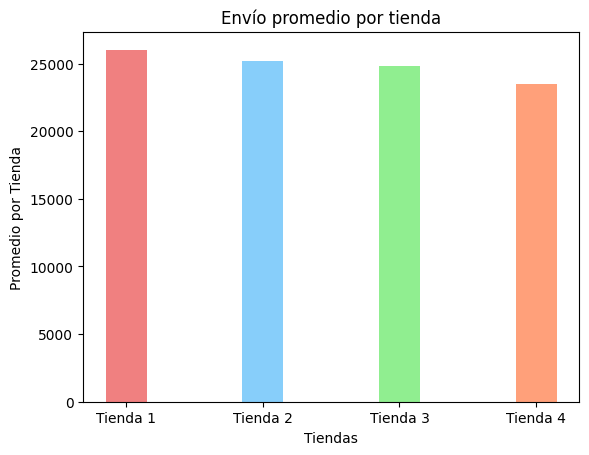

In [ ]:
Tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# colores de grafico
colores = ['lightcoral', 'lightskyblue', 'lightgreen', 'lightsalmon']

#Promedio de Envio
plt.bar(Tiendas, PromedioTiendas, color= colores, width=0.3)
plt.xlabel('Tiendas')
plt.ylabel('Promedio por Tienda')

# Añadir un título al gráfico
plt.title('Envío promedio por tienda')

# Mostrar el gráfico
plt.show()


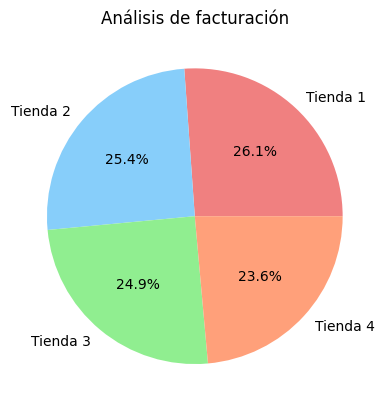

In [ ]:

#ingresos de la tienda
plt.pie(IngresoTotal_Tienda, labels=Tiendas, colors=colores, autopct='%1.1f%%')

# Añadir un título al gráfico
plt.title('Análisis de facturación')

# Mostrar el gráfico
plt.show()


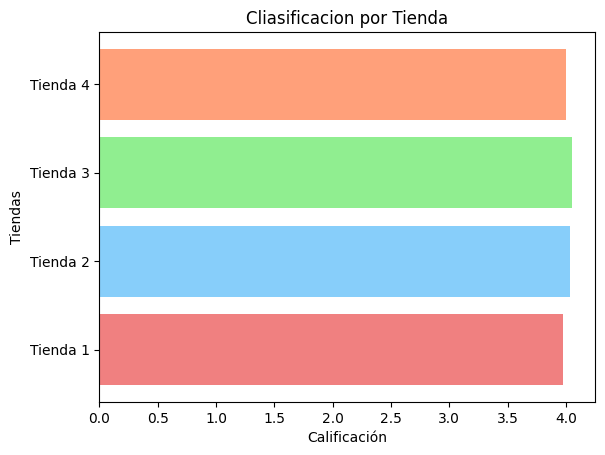

In [ ]:
#Cliasificacion por Tienda
plt.barh(Tiendas, ClasificacionxTienda, color= colores)
plt.xlabel('Calificación')
plt.ylabel('Tiendas')



# Añadir un título al gráfico
plt.title('Cliasificacion por Tienda')

# Mostrar el gráfico
plt.show()


A continuación, se presenta un análisis detallado de cada tienda en función de los factores evaluados:

1. Ingresos Totales:
La Tienda 1 lidera significativamente en ingresos totales, por lo tanto, desde una perspectiva puramente de ingresos, la Tienda 1 es la más atractiva. Sin embargo, es importante considerar otros factores para obtener un analisis completo.

2. Categorías de Productos Más y Menos Vendidas:

Muebles y Electrónicos, son consistentemente las categorías más vendidas en todas las tiendas, lo que sugiere una fuerte demanda general para estos productos. La Tienda 3 destaca ligeramente en la venta de Muebles.
Artículos para el hogar, Libros e Instrumentos musicales: Tienden a ser las categorías con menores ventas en la mayoría de las tiendas, indicando una menor demanda o una posible necesidad de revisar la estrategia de venta de estas categorías. La Tienda 2 muestra un rendimiento relativamente mejor en Instrumentos musicales y Libros en comparación con las otras tiendas. La Tienda 4 tiene un rendimiento ligeramente mejor en Artículos para el hogar.

3. Calificaciones Promedio de los Clientes:

Las calificaciones promedio de los clientes son bastante similares entre las cuatro tiendas, con la Tienda 3 ligeramente por encima. La Tienda 1 tiene la calificación ligeramente más baja.

4. Productos Más y Menos Vendidos:

 Esta información proporciona una visión más granular del rendimiento de productos específicos. La Tienda 2 tiene un producto más vendido inusual en los mas vendidos "Iniciando en programación", lo que podría indicar un enfoque diferente o un nicho de mercado. Las otras tiendas muestran productos más vendidos típicos de sus categorías principales (Muebles y Electrónicos). Los productos menos vendidos varían significativamente entre tiendas, lo que podría reflejar diferencias en el catálogo de productos o en la demanda local.

 5. Costo de Envío Promedio:

 La Tienda 4 tiene el costo de envío promedio más bajo, lo que podría ser una ventaja competitiva en términos de atracción de clientes sensibles al precio del envío. La Tienda 1 tiene el costo de envío promedio más alto.

#Conclusión y Recomendación:

Considerando todos los factores, la decisión de venta dependera de los objetivos del vendedor. Basándonos en la información disponible, se puede inferir lo siguente:

Fortalezas de la Tienda 1: Lidera en ingresos totales.
Debilidades de la Tienda 1: Tiene la calificación promedio de clientes ligeramente más baja y el costo de envío promedio más alto. Algunos productos electrónicos específicos tienen bajas ventas.

Fortalezas de la Tienda 2: Tiene una calificación promedio de clientes sólida y un costo de envío competitivo. Muestra un rendimiento relativamente mejor en categorías menos vendidas en otras tiendas (Instrumentos musicales y Libros).
Debilidades de la Tienda 2: Ingresos totales más bajos en comparación con la Tienda 1. Un producto más vendido atípico podría indicar una dependencia de un nicho específico.

Fortalezas de la Tienda 3: Tiene la calificación promedio de clientes más alta y un costo de envío competitivo. Lidera ligeramente en la venta de Muebles.
Debilidades de la Tienda 3: Ingresos totales más bajos en comparación con las Tiendas 1 y 2.

Fortalezas de la Tienda 4: Tiene el costo de envío promedio más bajo y una buena calificación promedio de clientes.
Debilidades de la Tienda 4: Tiene los ingresos totales más bajos.


#Recomendación:
La Tienda 4 se destaca como la más débil al considerar los siguientes puntos:

  -Genera significativamente menos ingresos en comparación con las otras tres tiendas, por lo tanto, rentabilidad

  -Rendimiento en Categorías: Si bien tiene un buen desempeño en la venta de "Artículos para el hogar" en comparación con las otras tiendas, no presenta un liderazgo claro en las categorías principales como Muebles y Electrónicos.

  -Producto Menos Vendido Específico: Su producto menos vendido, "Guitarra eléctrica", podría indicar una falta de demanda en esa área específica o una mala gestión de inventario en esa categoría.

Si bien la Tienda 4 tiene el costo de envío promedio más bajo y una calificación promedio de clientes decente de 4, estos factores no compensan su considerablemente menor rendimiento en términos de ingresos totales.

En resumen, si el objetivo es vender la tienda con el rendimiento general más bajo, la Tienda 4 es la candidata más clara debido a sus ingresos totales más bajos en comparación con las demás. Vender esta tienda permitiría enfocar los recursos y la atención en las operaciones más rentables y con mayor potencial de crecimiento.